O objetivo do notebook é criar um pipeline de detecção de fake news utilizando aprendizado de máquina. O processo envolve pré-processamento de texto, vetorização, divisão dos dados, treinamento de modelos e avaliação do melhor modelo para prever a autenticidade de novas notícias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

In [ ]:
# Baixar recursos do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Importação de Bibliotecas: Importamos as bibliotecas necessárias para manipulação de dados (pandas, numpy), vetorização de texto (TfidfVectorizer), divisão e validação de dados (train_test_split, cross_val_score), modelos de machine learning (LogisticRegression, RandomForestClassifier, SVC), métricas de avaliação (accuracy_score, classification_report), e ferramentas de processamento de linguagem natural (stopwords, word_tokenize, nltk, re).


In [ ]:
# Função de pré-processamento
def preprocess_text(text):
    # Remover caracteres especiais e números
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Converter para minúsculas
    text = text.lower()
    # Tokenizar
    tokens = word_tokenize(text)
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Rejuntar em texto
    return ' '.join(tokens)

Remoção de Caracteres Especiais e Números: Usamos uma expressão regular para remover tudo que não seja uma letra.

Conversão para Minúsculas: Convertemos todo o texto para minúsculas para manter a consistência.

Tokenização: Dividimos o texto em palavras individuais.

Remoção de Stopwords: Removemos palavras comuns que não adicionam significado (como "a", "e", "o").

Rejuntar em Texto: Rejuntamos os tokens em um único texto limpo.

In [ ]:
df = pd.read_csv('news.csv')
df.shape

(6335, 4)

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# numero de fake news
df['label'].value_counts()

,count
label,
REAL,3171
FAKE,3164


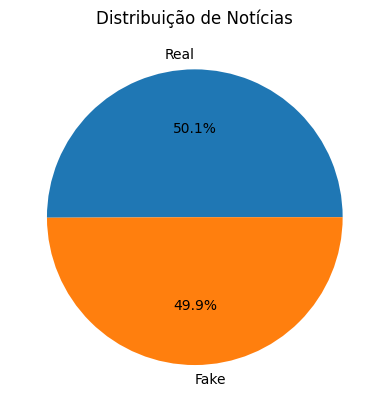

In [ ]:
#Grafico em pizza pare ver os resultados
labels = ['Real', 'Fake']
plt.pie(df['label'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Distribuição de Notícias')
plt.show()

In [ ]:
#Ajustando arquivo
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Verificar e pré-processar o texto
df['title'] = df['title'].apply(preprocess_text)
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
# Separar features e target
X = df['title'] + ' ' + df['text']
y = df['label']

Separação das Features e do Target: X contém o texto das notícias pré-processadas e y contém as labels (verdadeiro ou falso).

In [ ]:
# Vetorização com TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(X)


TF-IDF: Usamos o TfidfVectorizer para converter o texto em uma matriz de características numéricas. max_features=5000 limita o número de características e ngram_range=(1, 2) considera unigramas e bigramas.

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividindo os dados em treino e teste

In [ ]:
# Modelos para teste
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

In [ ]:
# Treinar e avaliar modelos
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    # Validação cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    print(f"{model_name} - Cross-Validation Accuracy: {mean_accuracy:.4f}")

Logistic Regression - Cross-Validation Accuracy: 0.9138
Random Forest - Cross-Validation Accuracy: 0.9029
SVM - Cross-Validation Accuracy: 0.9260


In [ ]:
# Treinar no conjunto de treino completo
model.fit(X_train, y_train)
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, predictions))


SVM - Test Accuracy: 0.9282
              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       628
        REAL       0.93      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [ ]:
# Escolher o melhor modelo
if test_accuracy > best_accuracy:
    best_accuracy = test_accuracy
    best_model = model

print(f"Best Model: {best_model} with accuracy {best_accuracy:.4f}")


Best Model: SVC(kernel='linear') with accuracy 0.9282


Definição dos Modelos: Definimos três modelos: Regressão Logística, Random Forest e SVM.

Validação Cruzada: Usamos validação cruzada para avaliar a precisão de cada modelo.

Treinamento e Avaliação: Treinamos cada modelo no conjunto de treino completo e avaliamos no conjunto de teste.

Escolha do Melhor Modelo: Comparamos as precisões e selecionamos o modelo com a melhor precisão.

In [ ]:
# Função para prever novas notícias
def predict_fake_news(text):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = best_model.predict(vectorized_text)
    return prediction[0]


In [ ]:
# Exemplo de uso
new_text = "Breaking news: AI is transforming the world in unimaginable ways!"
result = predict_fake_news(new_text)
print(f"The news is predicted to be: {'FAKE' if result == 'fake' else 'REAL'}")

The news is predicted to be: REAL


Função de Predição: Criamos uma função que pré-processa um novo texto, vetoriza e usa o melhor modelo treinado para fazer uma previsão.

Exemplo de Uso: Testamos a função com um exemplo de texto.

O notebook cria um modelo de machine learning para detectar fake news. Ele envolve o pré-processamento de texto, vetorização, divisão de dados, treinamento de modelos e avaliação. O objetivo final é prever a autenticidade de novas notícias.